# Experimenting with Sentinelsat and Rasterio

In this notebook, I've downloaded a satellite image off the Scoresbysund area in Eastern Greenland. This image was obtained by the Sentinelsat module, then subsequently imported into Rasterio, where the images were decoded.

### Connecting to ESA

In [1]:
# connect to the API
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date

api = SentinelAPI('kongstad', '********', 'https://scihub.copernicus.eu/dhus')

#### Applying search criteria

In [2]:
# search by polygon, time, and SciHub query keywords
footprint = geojson_to_wkt(read_geojson('geojson/scoresbysund_small.geojson'))
products = api.query(footprint,
                     date=('20170826', date(2017, 8, 27)), #I've chosen only 1 day for 1 example. Due to file sizes
                     platformname='Sentinel-2',
                     cloudcoverpercentage=(0,5))

# Saving information of the products in a variable
api.to_geojson(products)


{"features": [{"geometry": {"coordinates": [[[-23.913448967349836, 70.27661715587688], [-23.918211229201823, 70.27400136477334], [-24.15467295718129, 70.14632067547386], [-24.37546116888998, 70.02280708729191], [-24.343002735569513, 70.28644046073472], [-23.913448967349836, 70.27661715587688]]], "type": "Polygon"}, "id": 0, "properties": {"beginposition": "2017-08-26T14:00:09.027000Z", "cloudcoverpercentage": 1.4308, "datatakesensingstart": "2017-08-26T14:00:09.027000Z", "endposition": "2017-08-26T14:00:09.027000Z", "filename": "S2B_MSIL1C_20170826T140009_N0205_R010_T26WPC_20170826T140009.SAFE", "format": "SAFE", "hv_order_tileid": "WC26P", "id": "bc24b16e-7daa-4b19-9c24-13099485c0bc", "identifier": "S2B_MSIL1C_20170826T140009_N0205_R010_T26WPC_20170826T140009", "ingestiondate": "2017-08-27T01:22:11.185000Z", "instrumentname": "Multi-Spectral Instrument", "instrumentshortname": "MSI", "link": "https://scihub.copernicus.eu/dhus/odata/v1/Products('bc24b16e-7daa-4b19-9c24-13099485c0bc')/$

#### Downloading images
This download is not the one used in the notebook. The one used in the notebook is over 1gb download. So I choose a smaller file for illustration

In [3]:
# download all results from the search
api.download_all(products,'sentinel2images/')

Downloading: 100%|██████████| 23.6M/23.6M [00:22<00:00, 669kB/s] 
MD5 checksumming: 100%|██████████| 23.6M/23.6M [00:00<00:00, 288MB/s]


(OrderedDict([('bc24b16e-7daa-4b19-9c24-13099485c0bc',
               {'date': datetime.datetime(2017, 8, 26, 14, 0, 9, 27000),
                'downloaded_bytes': 23637434,
                'footprint': 'POLYGON((-23.913448967349836 70.27661715587688,-23.918211229201823 70.27400136477334,-24.15467295718129 70.14632067547386,-24.37546116888998 70.02280708729191,-24.343002735569513 70.28644046073472,-23.913448967349836 70.27661715587688))',
                'id': 'bc24b16e-7daa-4b19-9c24-13099485c0bc',
                'md5': '401F75275ED4C4405EFAA62C320361EC',
                'path': 'sentinel2images/S2B_MSIL1C_20170826T140009_N0205_R010_T26WPC_20170826T140009.zip',
                'size': 23637434,
                'title': 'S2B_MSIL1C_20170826T140009_N0205_R010_T26WPC_20170826T140009',
                'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('bc24b16e-7daa-4b19-9c24-13099485c0bc')/$value"})]),
 set())

#### Unzip the desired file
Then locate the combined multi-band image. The file does contain all 13 bands. However I'm only interested in the RGB composite of band 4,3 and 2. This picture is imported into Rasterio, where I extract some information from the image, as well as display it in different modes

### Rasterio Import

In [4]:
import rasterio

#Rasterio opens the file into a DATASET
dataset=rasterio.open('sentinel2images/S2A_MSIL1C_20170605T141011_N0205_R053_T26WNE_20170605T141006.SAFE/GRANULE/L1C_T26WNE_A010203_20170605T141006/IMG_DATA/T26WNE_20170605T141011_TCI.jp2')


#### Print out the boundaries of the image

In [5]:
#Saves the boundaries/dimension of the map.
boundaries=dataset.bounds

print(boundaries)

BoundingBox(left=499980.0, bottom=7890240.0, right=609780.0, top=8000040.0)


#### Print out the reference system used in the image

In [6]:
#Defines the coordinate reference system used in the image.
referencesystem=dataset.crs

print(referencesystem)

CRS({'init': 'epsg:32626'})


#### Print out the number of bands in the image

In [7]:
#Shows how many bands are in the image
bands=dataset.indexes

print(bands)

(1, 2, 3)


#### Define the 3 bands into 3 variables

In [8]:
#Define the three bands of the image
band1=dataset.read(1)
band2=dataset.read(2)
band3=dataset.read(3)

#### Print out the complete reference system

In [9]:
#Shows format information in greater details
referencesystem2=dataset.crs.wkt

#### Displaying the image

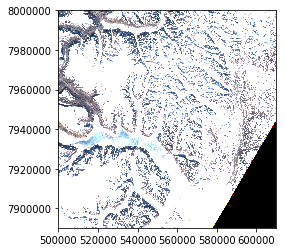

In [12]:
#%% Showing imported image
import rasterio
from matplotlib import pyplot
from rasterio.plot import show
#Shows the entire 3 bands in the image.
show(dataset)

#### Create 3 images by seperating into the 3 bands

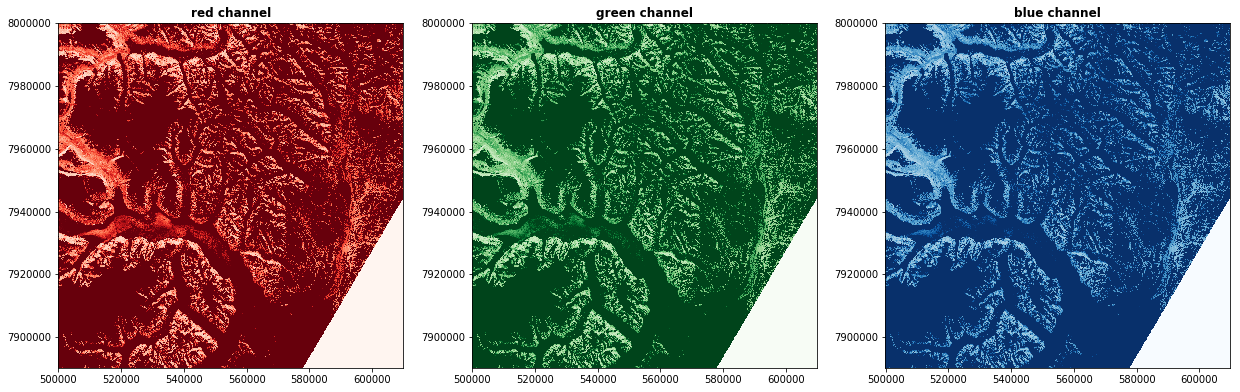

In [11]:
#Creating 3 figures with the 3 bands in the image
fig, (axr, axg, axb) = pyplot.subplots(1,3, figsize=(21,7))
show((dataset, 1), ax=axr, cmap='Reds', title='red channel')
show((dataset, 2), ax=axg, cmap='Greens', title='green channel')
show((dataset, 3), ax=axb, cmap='Blues', title='blue channel')
pyplot.show()